In [1]:
import pandas as pd

In [2]:
csv_file = "cleaned_final_data_utf-8.csv"
final_data = pd.read_csv(csv_file, index_col=0)
final_data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,Max_temp,Precip,Humidity,Heat_Index,Latitude_y,Longitude_y,Elevation,review_neg,review_neu,review_pos
1,US,"Overripe and Porty, with raisin, prune and cho...",Reserve,81,37,California,Paso Robles,Central Coast,NaN,NaN,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.000,0.000,0.829,0.171
2,US,"Strong aromas of blueberry paste, cracked pepp...",Paso Bordo Reserve,92,69,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.000,0.000,0.805,0.195
3,US,A vegetal note drags down the enjoyment. On th...,Reserve,84,39,California,Paso Robles,Central Coast,NaN,NaN,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.000,0.129,0.710,0.162
4,US,Larry Stanton patiently waits to release the w...,La Terraza Bloc Reserve,93,59,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.000,0.039,0.865,0.096
5,US,"High alcohol gives the wine heat, especially i...",La Tertazza Bloc Reserve,85,39,California,Paso Robles,Central Coast,NaN,NaN,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.000,0.000,0.895,0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48843,US,This spicy wine offers peppery strawberry flav...,Solare,87,26,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwineÂ,...,102.5,27.15,74.02,105.2,0.077000,0.807000,0.115,NaN,NaN,NaN
48844,US,This wine is partially barrel fermented and bl...,NaN,89,20,Washington,Columbia Gorge (WA),Washington Other,Sean P. Sullivan,@wawinereport,...,115.0,16.61,57.52,106.4,0.000000,0.927000,0.073,NaN,NaN,NaN
48845,US,"Clean and fresh, this pure varietal Grenache c...",Lonesome Spring Ranch,88,25,Washington,Yakima Valley,Columbia Valley,Paul Gregutt,@paulgwineÂ,...,112.9,6.90,57.53,107.1,0.059000,0.743000,0.197,NaN,NaN,NaN
48846,US,The seventh edition of this popular blend retu...,Red,88,20,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwineÂ,...,114.5,17.07,57.74,106.0,0.000000,0.897000,0.103,NaN,NaN,NaN


In [3]:
NLP_data = final_data.loc[:, ["description","points"]]
NLP_data.head(3)

,description,points
1,"Overripe and Porty, with raisin, prune and cho...",81
2,"Strong aromas of blueberry paste, cracked pepp...",92
3,A vegetal note drags down the enjoyment. On th...,84


In [4]:
# Sentiment Analysis
import nltk

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\itsme\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import numpy as np
def get_sentiment(data, col):
    sentiment_analyzer = SentimentIntensityAnalyzer()

    # Applying Model, Variable Creation
    data['polarity_score']=data[col].apply(lambda x:sentiment_analyzer.polarity_scores(x)['compound'])
    data['review_neu']=data[col].apply(lambda x:sentiment_analyzer.polarity_scores(x)['neu'])
    data['review_neg']=data[col].apply(lambda x:sentiment_analyzer.polarity_scores(x)['neg'])
    data['review_pos']=data[col].apply(lambda x:sentiment_analyzer.polarity_scores(x)['pos'])

    data['sentiment']= np.nan
    data.loc[data.polarity_score>0,'sentiment']='Positive'
    data.loc[data.polarity_score==0,'sentiment']='Neutral'
    data.loc[data.polarity_score<0,'sentiment']= 'Negative'
    return data

NLP_data = get_sentiment(data = NLP_data, col = 'description')

In [6]:
NLP_data

,description,points,polarity_score,review_neu,review_neg,review_pos,sentiment
1,"Overripe and Porty, with raisin, prune and cho...",81,0.4417,0.829,0.000,0.171,Positive
2,"Strong aromas of blueberry paste, cracked pepp...",92,0.8658,0.805,0.000,0.195,Positive
3,A vegetal note drags down the enjoyment. On th...,84,0.0644,0.710,0.129,0.162,Positive
4,Larry Stanton patiently waits to release the w...,93,0.5434,0.865,0.039,0.096,Positive
5,"High alcohol gives the wine heat, especially i...",85,0.6423,0.895,0.000,0.105,Positive
...,...,...,...,...,...,...,...
48843,This spicy wine offers peppery strawberry flav...,87,0.2484,0.807,0.077,0.115,Positive
48844,This wine is partially barrel fermented and bl...,89,0.4588,0.927,0.000,0.073,Positive
48845,"Clean and fresh, this pure varietal Grenache c...",88,0.6705,0.743,0.059,0.197,Positive
48846,The seventh edition of this popular blend retu...,88,0.6310,0.897,0.000,0.103,Positive


Text(0.5, 0, 'Sentiment Label')

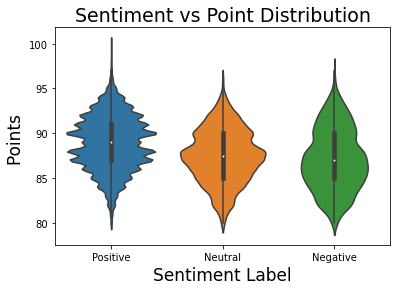

In [7]:
import seaborn as sns
import numpy as np
a = sns.violinplot(data=NLP_data, x="sentiment", y="points")
a.set_title("Sentiment vs Point Distribution", fontsize=19)
a.set_ylabel("Points ", fontsize=17)
a.set_xlabel("Sentiment Label", fontsize=17)

In [8]:
final_data[['review_neg', 'review_neu', 'review_pos']] = NLP_data[['review_neg','review_neu', 'review_pos']]
final_data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,Max_temp,Precip,Humidity,Heat_Index,Latitude_y,Longitude_y,Elevation,review_neg,review_neu,review_pos
1,US,"Overripe and Porty, with raisin, prune and cho...",Reserve,81,37,California,Paso Robles,Central Coast,NaN,NaN,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.000,0.000,0.829,0.171
2,US,"Strong aromas of blueberry paste, cracked pepp...",Paso Bordo Reserve,92,69,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.000,0.000,0.805,0.195
3,US,A vegetal note drags down the enjoyment. On th...,Reserve,84,39,California,Paso Robles,Central Coast,NaN,NaN,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.000,0.129,0.710,0.162
4,US,Larry Stanton patiently waits to release the w...,La Terraza Bloc Reserve,93,59,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.000,0.039,0.865,0.096
5,US,"High alcohol gives the wine heat, especially i...",La Tertazza Bloc Reserve,85,39,California,Paso Robles,Central Coast,NaN,NaN,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.000,0.000,0.895,0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48843,US,This spicy wine offers peppery strawberry flav...,Solare,87,26,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwineÂ,...,102.5,27.15,74.02,105.2,0.077000,0.807000,0.115,0.077,0.807,0.115
48844,US,This wine is partially barrel fermented and bl...,NaN,89,20,Washington,Columbia Gorge (WA),Washington Other,Sean P. Sullivan,@wawinereport,...,115.0,16.61,57.52,106.4,0.000000,0.927000,0.073,0.000,0.927,0.073
48845,US,"Clean and fresh, this pure varietal Grenache c...",Lonesome Spring Ranch,88,25,Washington,Yakima Valley,Columbia Valley,Paul Gregutt,@paulgwineÂ,...,112.9,6.90,57.53,107.1,0.059000,0.743000,0.197,0.059,0.743,0.197
48846,US,The seventh edition of this popular blend retu...,Red,88,20,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwineÂ,...,114.5,17.07,57.74,106.0,0.000000,0.897000,0.103,0.000,0.897,0.103


In [9]:
final_data.to_csv(path_or_buf=csv_file)